<h1>Principal component analysis (PCA)</h1>

Método de redução de dimensionalidade.<br>
Transforma um conjunto de variáveis correlacionadas em <br>
um novo conjunto de variáveis não correlacionadas, <br>
chamadas de componentes principais.<br>
Esses componentes explicam a maior parte da variância dos dados, <br>
om o menor número possível de dimensões.<br><br>

O PCA ajuda você a simplificar dados complexos mantendo o máximo de informação possível.<br><br>


<h4>Interpretação:</h4>
                                       
Após o PCA, cada componente principal é uma combinação das variáveis originais.
Você pode:<br>

✅ plotar um gráfico 2D dos dados no espaço dos componentes<br>
✅ usar os componentes como features para clustering ou classificação<br>
✅ visualizar estrutura dos dados (muito usado no Iris, MNIST, etc.)        

<h2>Iniciando o ambiente</h2>

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as pil
from pylab import rcParams
import seaborn as sb

from IPython.display import Image
from IPython.core.display import HTML


import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA


In [17]:
sb.set_style('whitegrid')
rcParams['figure.figsize'] = 5,4


<h2>Obtendo dataset iris.data</h2>

In [20]:
df = pd.read_csv('iris.data.csv')
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
df.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


In [23]:
X = df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values
X[:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [30]:

variable_names = df.columns.values
variable_names = np.delete(variable_names, 4)
variable_names


array(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'],
      dtype=object)

<h2>Construindo e treinando o modelo</h2>

In [32]:
pca = PCA()
iris_pca=pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92395143, 0.05349142, 0.01728809, 0.00526906])

In [34]:
pca.explained_variance_ratio_.sum()

1.0

In [43]:

comps = pd.DataFrame(pca.components_, columns=variable_names)
comps


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0.362427,-0.083525,0.856400,0.358118
1,0.655833,0.730515,-0.174593,-0.075822
2,-0.582227,0.597626,0.076403,0.545910
3,0.315503,-0.319710,-0.479852,0.753648


<Axes: >

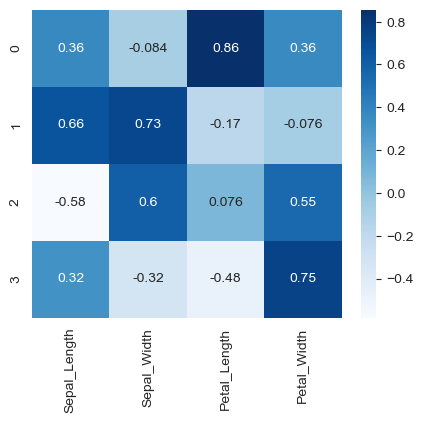

In [45]:

sb.heatmap(comps, cmap='Blues', annot=True)
